# 최 근접 이웃

- 가장 단순한 머신러닝 알고리즘

- 학습속도는 매우 빠르지만 예측 결과를 계산하는 속도가 느리다

- 데이터를 그냥 저장하는 것이 학습의 전부

- 새로 입력된 데이터와 학습된 데이터간의 거리를 측정해서 가장 가까운 거리에 있는 데이터의 결과가 예측 결과로 결정된다.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

### 분류

In [2]:
df1 = pd.read_csv('forge.csv')
df1.head()

,attr1,attr2,target
0,9.963466,4.596765,1
1,11.032954,-0.168167,0
2,11.541558,5.211161,1
3,8.692890,1.543220,0
4,8.106227,4.286960,0


In [3]:
x = df1[['attr1', 'attr2']]
y = df1['target']

x_train, x_test, y_train, y_test = train_test_split(x,y)

In [4]:
# n_neighbors : 이웃의 수, 증가시킬 경우 정확도가 올라가다가 급격하게 떨어짐
model1 = KNeighborsClassifier(n_neighbors=1)
model1.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [5]:
r1 = model1.score(x_test, y_test)
r1

0.8571428571428571

In [6]:
df2 = pd.read_csv('breast_cancer.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df2['target'].value_counts()

benign       357
malignant    212
Name: target, dtype: int64

In [8]:
map1 = {
    'benign' : 0,
    'malignant' : 1
    
}

df2['target'] = df2['target'].map(map1)
df2['target'].value_counts()

0    357
1    212
Name: target, dtype: int64

In [90]:
x = df2.drop(['target'], axis = 1)
y = df2['target']

x_train, x_test, y_train, y_test = train_test_split(x,y)

In [91]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [92]:
r1 = model2.score(x_test, y_test)
r1

0.9300699300699301

In [93]:
y_pred = model2.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

### 회귀

In [116]:
df3 = pd.read_csv('wave.csv')
df3.head()

,data,target
0,-0.752759,-0.448221
1,2.704286,0.331226
2,1.391964,0.779321
3,0.591951,0.034979
4,-2.063888,-1.387736


In [126]:
# 회귀는 행렬 형태로 되어있어야 한다.

# 입력 데이터는 2차원 행렬로 되어있어야
x = df3['data'].values.reshape(-1,1)

# 결과 데이터는 1차원 배열
y = df3['target'].values

x_train, x_test, y_train, y_test = train_test_split(x,y)

In [139]:
model3 = KNeighborsRegressor(n_neighbors = 3)
model3.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [140]:
r3 = model3.score(x_test, y_test)
r3

0.8079591841435251

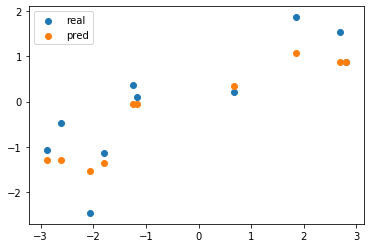

In [141]:
import matplotlib.pyplot as plt

y_pred = model3.predict(x_test)

plt.scatter(x_test, y_test, label ='real')
plt.scatter(x_test, y_pred, label ='pred' )
plt.legend()

In [144]:
df4 = pd.read_csv('boston.csv')
df4.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [145]:
x = df4.drop(['target'], axis = 1).values
y = df4['target'].values

x_train, x_test, y_train, y_test = train_test_split(x,y)

In [150]:
model4 = KNeighborsRegressor(n_neighbors=3)
model4.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

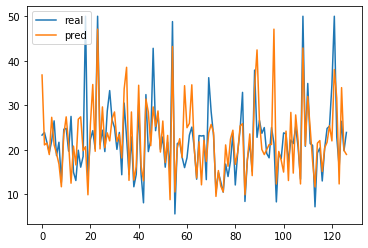

In [151]:
y_pred = model4.predict(x_test)

plt.plot(y_test, label ='real')
plt.plot(y_pred, label ='pred')
plt.legend()